# **EDA (Exploratory data analysis) and Visualization of a Real-World Dataset**
####  **Performing exploratory data analysis (EDA) on a dataset such as the Titanic Dataset**


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore

### **1. Load the Dataset**

In [2]:
df=pd.read_csv('Titanic-Dataset.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


### **2. Data Cleaning**

In [4]:
# (i) Handle missing values using imputation techniques or removal
for col in df.select_dtypes(include=['float64', 'int64']).columns:
    df[col].fillna(df[col].mean())    

df.to_csv('Titanic-Dataset_Imputed.csv', index=True)

In [5]:
# (ii) Remove duplicates
df.drop_duplicates(inplace=True) # drop_duplicates is used for removing duplicate rows

### **Outlier Detection & Management**

#### **Outliers** are data points that are significantly different from the majority of the data.

#### **Detection Methods:**
- **Statistical Methods**
- **Visual Methods**

*Identifying outliers helps improve data quality and analysis accuracy.*

In [6]:
# (iii) Identifying and managing Outliers using interquartile range (IQR) method
q1_age=df['Age'].quantile(0.25)
q3_age=df['Age'].quantile(0.75)
iqr_age=q3_age-q1_age
lower_bound_age=q1_age-1.5*iqr_age
upper_bound_age=q3_age+1.5*iqr_age
outliers_iqr_age=df[(df['Age']<lower_bound_age) | (df['Age']>upper_bound_age)]

# Another Column for Outlier Detection using IQR method
q1_fare=df['Fare'].quantile(0.25)
q3_fare=df['Fare'].quantile(0.75)
iqr_fare=q3_fare-q1_fare
lower_bound_fare=q1_fare-1.5*iqr_fare
upper_bound_fare=q3_fare+1.5*iqr_fare
outliers_iqr_age=df[(df['Fare']<lower_bound_fare) | (df['Fare']>upper_bound_fare)]


In [7]:
# Identifying and detecting Outliers using zscore
z_scores_age=zscore(df['Age'])
outliers_zscore_age=df[(z_scores_age>3) | (z_scores_age<-3)]

# Another Column for Outlier Detection using zscore
z_scores_fare=zscore(df['Fare'])
outliers_zscore_fare=df[(z_scores_fare>3) | (z_scores_fare<-3)]

### **3. Visualizations**

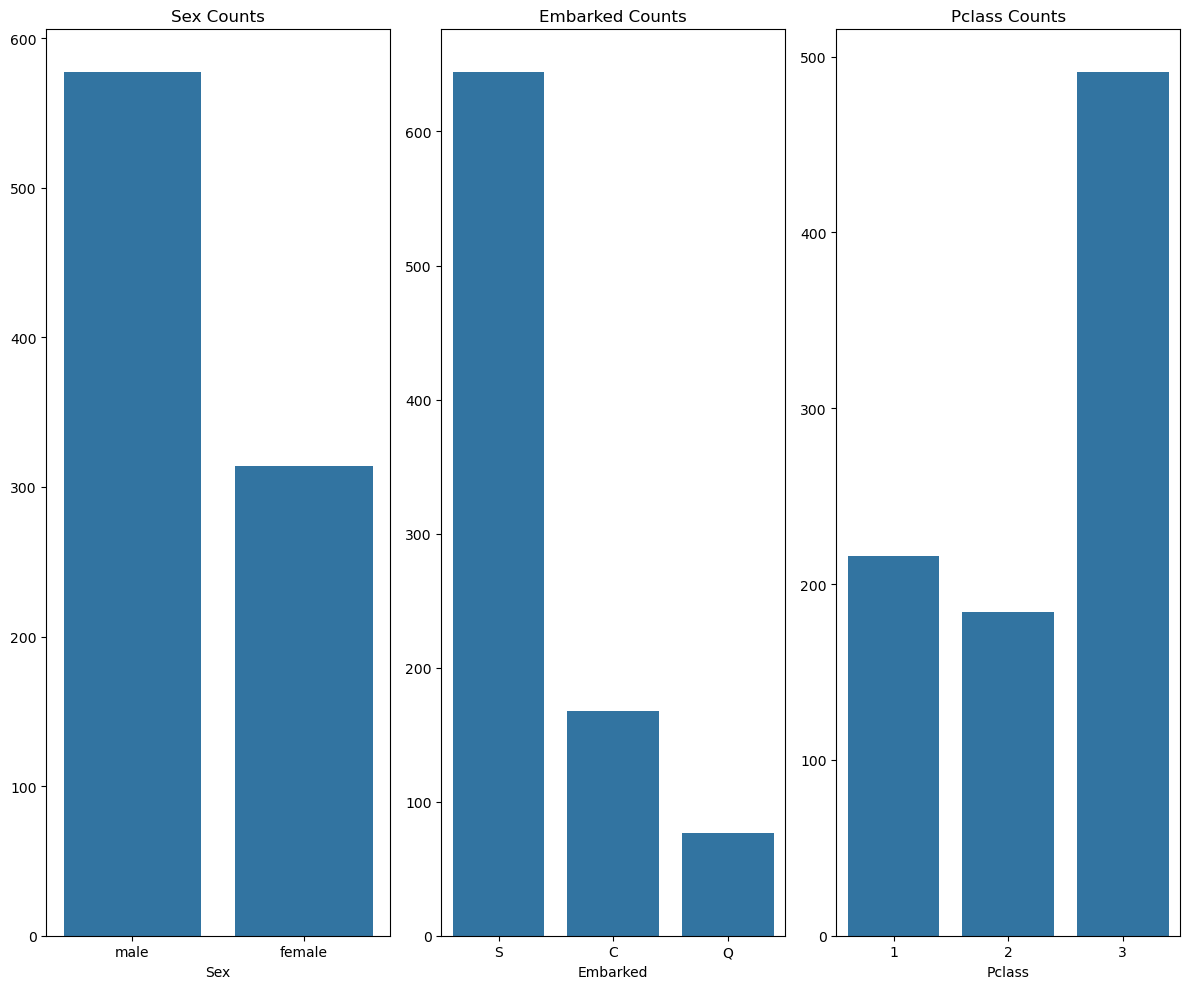

In [8]:
# (i) Create bar charts for categorical variables.

plt.figure(figsize=(12, 10))

plt.subplot(1,3,1)
sex_counts = df['Sex'].value_counts()
sns.barplot(x=sex_counts.index, y=sex_counts.values)
plt.title('Sex Counts')

plt.subplot(1,3,2)
Embarked_counts = df['Embarked'].value_counts()
sns.barplot(x=Embarked_counts.index, y=Embarked_counts.values)
plt.title('Embarked Counts')

plt.subplot(1,3,3)
Pclass_counts = df['Pclass'].value_counts()
sns.barplot(x=Pclass_counts.index, y=Pclass_counts.values)
plt.title('Pclass Counts')

plt.tight_layout()

plt.show()

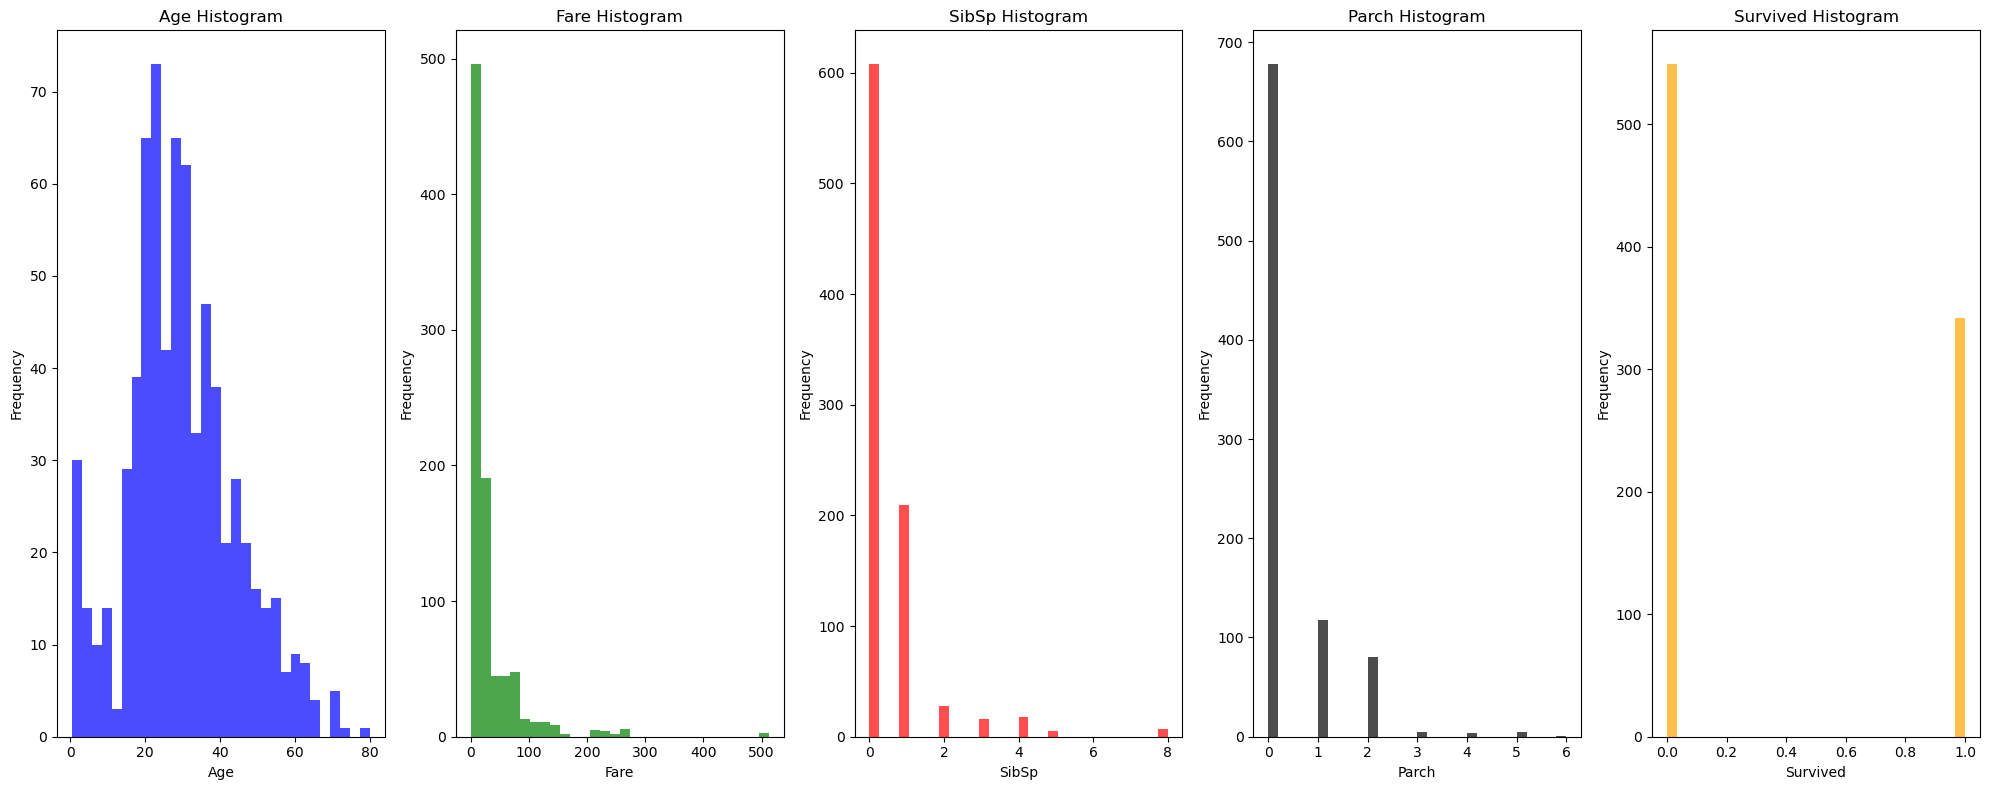

In [9]:
# Visualization of Numeric Distribution using Histogran

plt.figure(figsize=(20, 8))

plt.subplot(1,5,1)
plt.hist(df['Age'],bins=30,color='blue',alpha=0.7)
plt.title('Age Histogram')
plt.xlabel('Age')
plt.ylabel('Frequency')

plt.subplot(1,5,2)
plt.hist(df['Fare'],bins=30,color='green',alpha=0.7)
plt.title('Fare Histogram')
plt.xlabel('Fare')
plt.ylabel('Frequency')

plt.subplot(1,5,3)
plt.hist(df['SibSp'],bins=30,color='red',alpha=0.7)
plt.title('SibSp Histogram')
plt.xlabel('SibSp')
plt.ylabel('Frequency')

plt.subplot(1,5,4)
plt.hist(df['Parch'],bins=30,color='black',alpha=0.7)
plt.title('Parch Histogram')
plt.xlabel('Parch')
plt.ylabel('Frequency')

plt.subplot(1,5,5)
plt.hist(df['Survived'],bins=30,color='orange',alpha=0.7)
plt.title('Survived Histogram')
plt.xlabel('Survived')
plt.ylabel('Frequency')

plt.tight_layout()

plt.show()

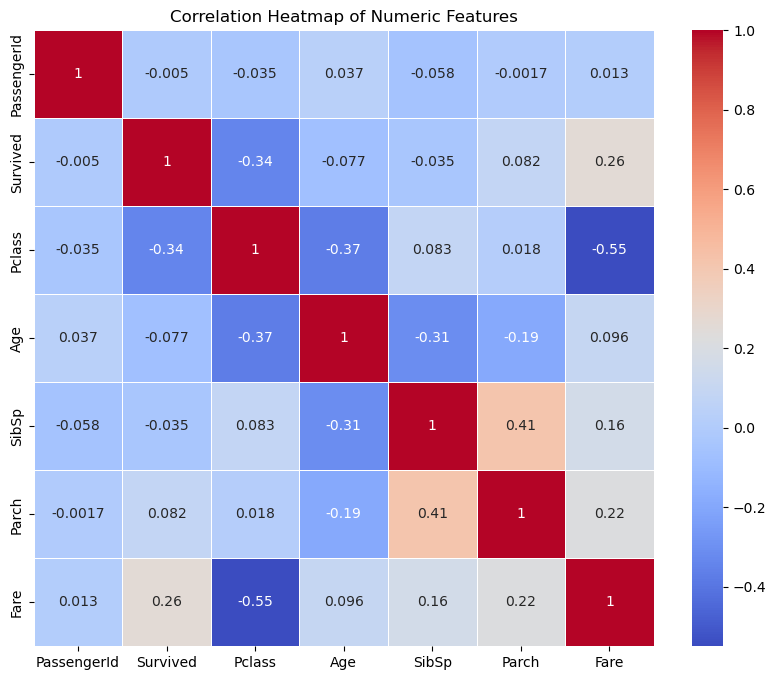

In [ ]:
#(iii) Create a heatmap to visualize the correlation between numeric features
numeric_df = df.select_dtypes(include=['int64', 'float64'])
correlation_matrix = numeric_df.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap of Numeric Features')
plt.show()

## **Handle Outliers**

In [11]:
# Removing Outliers
df_cleaned_age = df[(df['Age'] >= lower_bound_age) & (df['Age'] <= upper_bound_age)]

df_cleaned_fare = df[(df['Fare'] >= lower_bound_fare) & (df['Fare'] <= upper_bound_fare)]

In [12]:
# Capping Outliers
df['age_capped'] = df['Age'].clip(lower=lower_bound_age, upper=upper_bound_age)

df['Fare_capped'] = df['Fare'].clip(lower=lower_bound_fare, upper=upper_bound_fare)

In [13]:
# Median 
median_value_age = df['Age'].median()
df['age_replaced'] = df['Age']
df.loc[df['Age'] > upper_bound_age, 'age_replaced'] = median_value_age
df.loc[df['Age'] < lower_bound_age, 'age_replaced'] = median_value_age


median_value_fare = df['Fare'].median()
df['fare_replaced'] = df['Fare']
df.loc[df['Fare'] > upper_bound_fare, 'fare_replaced'] = median_value_fare
df.loc[df['Fare'] < lower_bound_fare, 'fare_replaced'] = median_value_fare

# **4. Titanic Dataset: Visual Data Analysis Summary**

## 1. Histogram Overview

### Age Distribution
- The majority of passengers were between 20 and 40 years old.
- The distribution is right-skewed, indicating a smaller number of older passengers.

### Fare Distribution
- Most passengers paid fares under 100.
- The distribution is also right-skewed due to a few passengers who paid exceptionally high fares.

### SibSp (Number of Siblings/Spouses Aboard)
- A significant portion of passengers had 0 or 1 sibling/spouse aboard.
- Passengers traveling with larger families were relatively rare.

### Parch (Number of Parents/Children Aboard)
- Similar to SibSp, most passengers had no parents or children accompanying them.
- Only a small number of passengers traveled with more than two family members.

### Survival Distribution
- A greater number of passengers did not survive.
- This indicates that the overall survival rate was below 50%.

---

## 2. Fare and Survival Analysis

- Survivors tended to have paid higher fares compared to non-survivors.
- Passengers who paid lower fares had lower survival rates.
- This suggests a correlation between fare amount, passenger class, and likelihood of survival.

---

## 3. Correlation Heatmap Insights

### Stronger Correlations

| Feature Pair         | Correlation | Interpretation                                                  |
|----------------------|-------------|------------------------------------------------------------------|
| Pclass & Fare        | -0.55       | Higher-class tickets were associated with higher fares.          |
| Survived & Pclass    | -0.34       | Passengers in higher classes had higher survival rates.          |
| Survived & Fare      | 0.26        | Higher fares were linked to increased chances of survival.       |
| SibSp & Parch        | 0.41        | Passengers with siblings/spouses often traveled with parents/children. |
| Age & Pclass         | -0.37       | Younger passengers were more commonly found in lower classes.    |

### Weaker or Negligible Correlations

- **Survived & Age**: -0.077 — Older passengers had slightly lower survival rates.
- **Survived & Parch**: 0.082 — Traveling with family had a minor positive influence on survival.

---

## Final Insights

- Age, Fare, and Pclass were the most influential factors related to survival.
- Higher-class passengers and those who paid more were more likely to survive.
- Family-related features (SibSp and Parch) showed limited but noteworthy influence.
- Most numerical features (Fare, Age, SibSp, Parch) displayed right-skewed distributions.
